In [4]:
# # 색상, 형태, 패턴
# 1. 질감 (Texture)
# CNN을 사용하면 미술 작품의 질감을 분석할 수 있습니다. 이를 통해 작품이 어떤 재료로 만들어졌는지, 또는 어떤 기법을 사용했는지 파악할 수 있을 수 있습니다.
# 2. 스타일 (Style)
# 특정 작가의 독특한 스타일이나, 예술의 특정 흐름 (예: 인상주의, 표현주의 등)을 분석하는 것도 가능합니다.
# 3. 구성 요소 (Composition)
# 이미지 내의 객체들이 어떻게 배치되어 있는지, 중심은 어디인지 등의 구성 요소를 분석할 수 있습니다.
# 4. 대비와 명도 (Contrast and Brightness)
# 작품의 전반적인 대비와 명도를 분석하여, 예를 들어 작품의 주제나 느낌이 어둡고 무거운지, 아니면 밝고 경쾌한지를 알 수 있습니다.
# 5. 레이어와 깊이 (Layers and Depth)
# CNN은 여러 계층을 통해 이미지의 깊이나 레이어를 분석할 수 있습니다. 이를 통해 2D 이미지에서도 3D 같은 효과를 느끼게 하는 작품을 분석할 수 있습니다.
# 6. 객체 인식 (Object Recognition)
# 이미지 내의 특정 객체나 캐릭터를 인식할 수 있습니다. 예를 들어, 작품에 나타난 특정 동물이나 사물, 인물 등을 파악하는 것이 가능합니다.

# TensorFlow와 Keras의 필요한 모듈을 임포트합니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 모델을 초기화합니다.
model = Sequential()

# 첫 번째 합성곱 계층을 추가합니다. 32개의 3x3 필터를 사용하고, 활성화 함수로는 ReLU를 사용합니다.
# 입력 이미지의 크기는 64x64이고, 채널 수는 3입니다.
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# 최대 풀링 계층을 추가합니다. 풀링 크기는 2x2입니다.
model.add(MaxPooling2D(pool_size=(2, 2)))

# 두 번째 합성곱 계층과 최대 풀링 계층을 추가합니다.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 평탄화 계층을 추가합니다. 이 계층은 2D 피처 맵을 1D 벡터로 변환합니다.
model.add(Flatten())

# 완전 연결 계층을 추가합니다. 128개의 뉴런을 사용하고, 활성화 함수로는 ReLU를 사용합니다.
model.add(Dense(128, activation='relu'))

# 드롭아웃 계층을 추가합니다. 이 계층은 과적합을 방지하기 위해 뉴런의 50%를 무작위로 비활성화합니다.
model.add(Dropout(0.5))

# 출력 계층을 추가합니다. 이진 분류 문제를 해결하기 위해 하나의 뉴런과 시그모이드 활성화 함수를 사용합니다.
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다. 최적화 알고리즘으로는 Adam을 사용하고, 손실 함수로는 이진 크로스엔트로피를 사용합니다.
# 성능 지표로는 정확도를 사용합니다.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델의 구조를 출력합니다.
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
# 데이터 전처리 및 레이블링
from PIL import Image

img = Image.open("example.jpg")
img = img.resize((64, 64))

import numpy as np

img_array = np.array(img)
img_array = img_array / 255.0

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(["행복", "슬픔", "자유", "사랑"])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size=0.2)


In [1]:
#Autoencoders
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import numpy as np

# 데이터 로딩
(x_train, _), (x_test, _) = mnist.load_data()

# 데이터 전처리
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# 파라미터 설정
encoding_dim = 32
input_img = Input(shape=(784,))

# 인코더 설정
encoded = Dense(encoding_dim, activation='relu')(input_img)

# 디코더 설정
decoded = Dense(784, activation='sigmoid')(encoded)

# 모델 구성
autoencoder = Model(input_img, decoded)

# 컴파일
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 학습
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# 결과 출력은 이 코드에 포함되어 있지 않습니다.


11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.2732 - val_loss: 0.1832
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1681 - val_loss: 0.1530
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1443 - val_loss: 0.1337
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1284 - val_loss: 0.1210
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1179 - val_loss: 0.1125
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1108 - val_loss: 0.1067
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1058 - val_loss: 0.1024
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1021 - val_loss: 0.0993
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0994 - val_loss: 0.0971
Epoch 10/50
235/235 [==============

313/313 [==============================] - 0s 839us/step


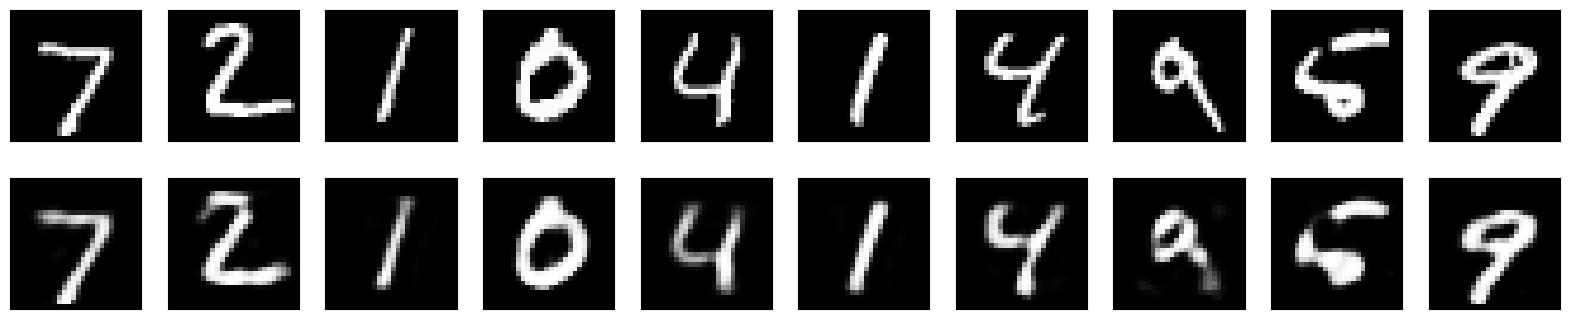

In [5]:
import matplotlib.pyplot as plt

# 테스트 데이터셋에서 이미지를 인코딩/디코딩
decoded_imgs = autoencoder.predict(x_test)

# 몇 개의 이미지를 시각적으로 비교
n = 10  # 몇 개의 숫자를 나타낼지 선택
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from tensorflow.keras.utils import to_categorical

# 분위기 카테고리 수 (예: 평온, 기쁨, 황홀, ...)
num_categories = 8

# 모델 초기화
model = Sequential()

# Convolutional Layer
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# 두 번째 Convolutional Layer와 Max Pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(units=128, activation='relu'))

# Dropout (Optional)
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(units=num_categories, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 더미 이미지 데이터 생성 (배치 크기: 1, 이미지 크기: 64x64, 채널: 3)
dummy_image_data = np.random.rand(1, 64, 64, 3)

# 더미 레이블 데이터 생성 (8개의 분위기 카테고리 중 하나를 선택)
dummy_label_data = to_categorical([3], num_classes=num_categories)

# 모델에 더미 이미지 데이터를 넣고 결과를 예측
model_prediction = model.predict(dummy_image_data)

# 예측 결과 출력
model_prediction


1/1 [==============================] - 0s 66ms/step


array([[0.1157617 , 0.13914387, 0.11047702, 0.11082496, 0.13275361,
        0.18277691, 0.12747297, 0.080789  ]], dtype=float32)